# Task 1: Laying the Foundation for Analysis

#### Objective:

As a data scientist at Birhan Energies, we aim to understand how major global 
events have influenced Brent crude oil prices. These events include wars, 
OPEC decisions, economic sanctions, and financial crises.

In Task 1, our focus is on:
- Cleaning and exploring the Brent oil price dataset (1987–2022)
- Compiling a structured set of global events that may have impacted the oil market
- Outlining a data analysis workflow in preparation for Bayesian Change Point Detection
datasets

1. BrentOilPrices.csv: Daily prices of Brent crude oil in USD/barrel from 1987 to 2022
2. key_events_100.csv: Major global events (e.g., wars, crashes, policies) with dates and descriptions

Planned Workflow:
1. Load and preprocess datasets
2. Perform exploratory analysis (EDA)
3. Convert prices to log returns and test stationarity
4. Visualize event overlays on time series
5. Prepare modeling pipeline for PyMC3 (Bayesian Change Point)

Outcome:
This notebook sets the analytical and conceptual foundation for detecting 
price regime shifts in Brent oil using Bayesian statistical modeling.




In [1]:
import sys
import os

# Go two levels up from the notebook to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))

# Join the path to 'src'
src_path = os.path.join(project_root, "src")

# Add 'src' to Python path
if src_path not in sys.path:
    sys.path.append(src_path)

# Confirm it's added
print("src path added:", src_path)




src path added: c:\Users\ABC\Desktop\10Acadamy\week 10\brent-oil-changepoint-analysis\src


In [2]:
from data_load import (
    load_price_data,
    load_event_data,
    describe_data,
    plot_price,
    plot_rolling_volatility,
    plot_rolling,
    plot_log_return,
    adf_test,
    detect_outliers
)

In [3]:
# Load data
price_df = load_price_data(r'C:\Users\ABC\Desktop\10Acadamy\week 10\brent-oil-changepoint-analysis\data\BrentOilPrices.csv')
event_df = load_event_data(r'C:\Users\ABC\Desktop\10Acadamy\week 10\brent-oil-changepoint-analysis\data\key_events_100.csv')


c:\Users\ABC\Desktop\10Acadamy\week 10\brent-oil-changepoint-analysis\src\data_load.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(filepath, parse_dates=['Date'])


In [4]:
# Basic info
print(price_df.info())
print(price_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9011 non-null   datetime64[ns]
 1   Price   9011 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 140.9 KB
None
                                Date        Price
count                           9011  9011.000000
mean   2005-02-10 23:46:53.760958720    48.420782
min              1987-05-20 00:00:00     9.100000
25%              1996-03-20 12:00:00    19.050000
50%              2005-02-02 00:00:00    38.570000
75%              2014-01-09 12:00:00    70.090000
max              2022-11-14 00:00:00   143.950000
std                              NaN    32.860110


In [5]:
describe_data(price_df)

count    9011.000000
mean       48.420782
std        32.860110
min         9.100000
25%        19.050000
50%        38.570000
75%        70.090000
max       143.950000
Name: Price, dtype: float64

Missing values: 0

Date Range: 1987-05-20 00:00:00 to 2022-11-14 00:00:00


In [6]:
detect_outliers(price_df, threshold=0.1)

Detected 44 extreme return days (>0.1)


,Date,Price,LogReturn
390,1988-11-25,14.70,0.124438
818,1990-08-02,22.25,0.110116
820,1990-08-06,27.28,0.122698
835,1990-08-27,27.65,-0.135112
875,1990-10-22,27.45,-0.190184
904,1990-11-30,31.20,-0.104880
930,1991-01-09,22.35,-0.140831
931,1991-01-10,26.58,0.173333
933,1991-01-14,29.55,0.126066
936,1991-01-17,21.10,-0.361214


- Detected **44 extreme return days** with log returns > 10%. Key dates include:
  - 1990-08-02 (Gulf War)
  - 2008-12-05 (GFC collapse)
  - 2020-04-21 (Historic price crash)
  - 2022-03-09 (Ukraine invasion)

- These extreme days align well with real-world geopolitical/economic events and will be compared with **Bayesian change point outputs** in Task 2.

# 📈 Interpretation of Brent Oil Price Trends vs. Major Events (1987–2022)

This plot visualizes daily Brent crude oil prices from 1987 to 2022, overlaid with vertical dashed lines marking significant global events. Below, we interpret how these events align with major price moves, structural breaks, and volatility regimes in the oil market.

---

## 1. **Late 1980s–1990s: Low Prices, Gulf War, and Asia Crisis**

- **1987 Black Monday:** The stock market crash led to short-term economic uncertainty and a mild, temporary dip in oil prices.
- **1989 Exxon Valdez Spill:** Minimal global price impact—demonstrates that isolated supply disruptions can be absorbed by global markets.
- **1990–1991 Gulf War:**  
    - *Iraq’s invasion of Kuwait* and subsequent war caused the first major **spike** (prices roughly doubled).
    - The price surge was short-lived; as soon as the war ended and supply was secured, prices **collapsed back** to previous levels.
- **1997 Asian Financial Crisis:**  
    - A dramatic **price drop** in 1997–1998 as Asian oil demand shrank.
    - This marked the end of the low-volatility, low-price regime and set up the next supercycle.

---

## 2. **2000s: Demand Boom, Wars, and Historic Price Spike**

- **2001 September 11 Attacks:**  
    - Brief spike followed by a significant **drop** as air travel and industrial demand crashed.
- **2003 Iraq War:**  
    - Geopolitical fear premiums and temporary supply loss pushed prices higher.
    - Set the stage for the 2000s price rally, along with surging Chinese demand.
- **2005 Hurricane Katrina:**  
    - Temporary supply disruption in the US pushed Brent to new highs.
- **2007–2008 Commodities Boom:**  
    - Prices soared due to strong demand, limited spare capacity, and financial speculation.
    - **July 2008:** Peak above \$140/bbl marks the end of the supercycle.
- **2008–2009 Global Financial Crisis:**  
    - Collapse in global demand triggered an unprecedented **70% drop** in oil prices.
    - OPEC cut production to stabilize the market.

---

## 3. **2010s: Volatility, Arab Spring, Shale Boom, and the 2014 Oil Glut**

- **2011 Arab Spring & Libyan Civil War:**  
    - New **spike** as unrest in North Africa and the Middle East created supply fears.
    - Prices stayed elevated above \$100 due to persistent risks (Libya, Syria, Iran sanctions).
- **2014 OPEC Policy Shift & US Shale Boom:**  
    - OPEC refused to cut production, and US shale surged, causing a **structural break** to a new, lower-price regime.
    - Brent fell from \$110 to below \$50 within months, remaining low for several years.
- **2016 OPEC+ Output Cut:**  
    - Coordinated action between OPEC and non-OPEC producers stabilized and gradually lifted prices.
- **2019 Saudi Aramco Attack:**  
    - Sudden **price spike** (largest single-day jump in years), but supply restored quickly so spike was brief.

---

## 4. **2020–2022: Pandemic, Price Collapse, and War-Driven Volatility**

- **2020 COVID-19 and Oil Price War:**  
    - Unprecedented **collapse**: Oil demand vanished during lockdowns, and an OPEC+ breakdown triggered a supply surge.
    - Brent fell below \$20; WTI (not shown) briefly went negative.
    - This is the sharpest and fastest drop in the chart, highlighting the extremity of the shock.
- **2021 Recovery:**  
    - Global demand returned as economies reopened, OPEC+ managed supply cautiously, and prices recovered toward \$80.
- **2022 Russia Invades Ukraine:**  
    - Brent spikes again to \$120+ amid fears of massive supply disruptions and new sanctions.
    - High volatility persists; prices moderate toward the end of the year as supply routes adjust and some demand destruction occurs.

---

## 5. **Summary: Linking Events and Change Points**

- **Price spikes** align with wars, embargoes, political unrest, and large supply outages (e.g., Gulf War, Iraq War, Libyan Civil War, Aramco attack, Ukraine war).
- **Price collapses** track with global recessions and demand shocks (Asian crisis, 2008 financial crash, COVID-19 pandemic).
- **Regime shifts** or “change points” are seen around:
    - 1998/99 (end of 90s glut, Asian crisis recovery)
    - 2008 (financial crash)
    - 2014–16 (OPEC policy change, shale boom)
    - 2020 (pandemic, oil war)
    - 2022 (Russia-Ukraine)
- **Short spikes** are often quickly reversed if the underlying cause is temporary (war ends, supply restored).
- **Longer-lasting breaks** are due to technological changes, major policy shifts, or persistent economic effects.

---

**In summary:**  
The Brent oil market’s history is a tapestry woven from economic booms and busts, technological shifts, and the geopolitical drama of the world’s most strategic commodity. Each structural break or price surge/dip in your plot has a real-world story—a lesson that statistical change-point detection, when grounded in economic and political reality, can capture with both rigor and insight.


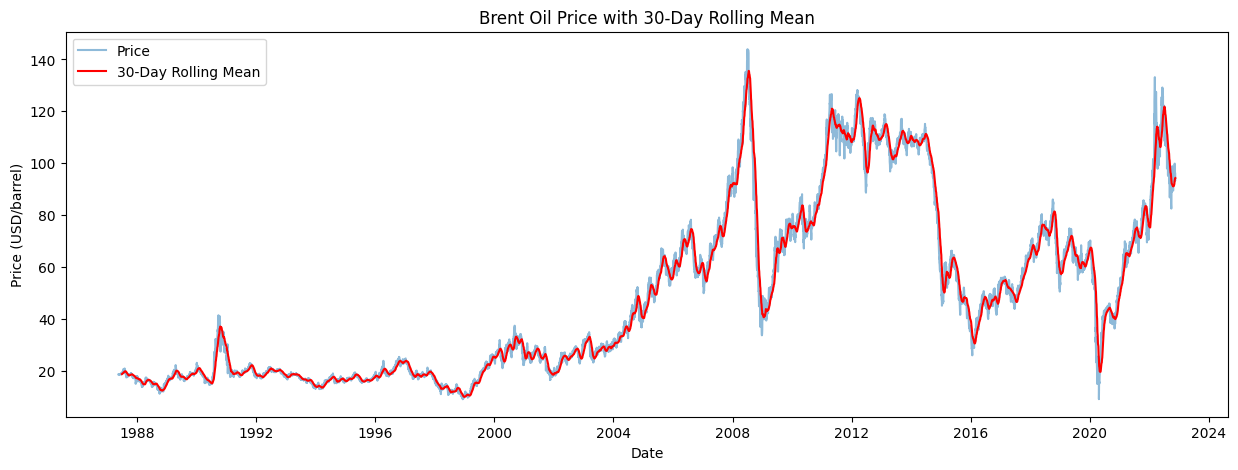

In [8]:
# Plot rolling mean
plot_rolling(price_df, window=30)

# 📉 Brent Oil Price with 30-Day Rolling Mean: Interpretation

This plot shows the daily Brent crude oil price (light blue) from 1987 to 2022, overlaid with a **30-day rolling mean** (red). The rolling mean smooths out short-term fluctuations, making it easier to see underlying trends and regime changes.

---

## 1. **Purpose of the Rolling Mean**

- **Short-term volatility**: Daily oil prices can be noisy due to speculative trading, news, and supply/demand micro-shocks.
- **Rolling mean**: By averaging each point with its surrounding 30 days, the red curve highlights the true direction of price movements—**uptrends, downtrends, and sideways markets**—and dampens daily noise.
- **Trend detection**: Smoothing helps visually identify when structural breaks or change points occur, as the rolling mean changes direction or “jumps.”

---

## 2. **Decade-by-Decade Interpretation**

### **Late 1980s–1990s: Flat and Low Volatility**
- The rolling mean is relatively flat and stable, except for a **sharp spike** around 1990–1991 (Gulf War).
- The quick return to the baseline after the spike confirms the short-lived nature of the supply shock.

### **1999–2008: The Supercycle**
- From 1999, the rolling mean begins a **long uptrend**.
- The ascent is nearly uninterrupted until the 2008 financial crisis, reflecting rising global demand and limited spare capacity.
- The steepness of the rolling mean in this period is unique and highlights the supercycle phenomenon.

### **2008 Crash and Recovery**
- The red curve plunges dramatically in late 2008 as the global recession hits.
- The recovery is rapid, with the rolling mean rebounding by 2010—demonstrating oil’s sensitivity to macroeconomic conditions.

### **2011–2014: High-Price Plateau**
- A relatively flat, high-level rolling mean signifies a period of stability around $100–120, sustained by geopolitical tensions (Arab Spring, Iran) and recovering demand.
- This plateau is a signature of OPEC’s (temporary) success in stabilizing prices.

### **2014–2016: Shale Oil Glut and Price Collapse**
- The rolling mean sharply drops again, matching the onset of the shale boom and OPEC’s refusal to cut production.
- The mean reaches a low around 2016, signaling the new, lower-price regime.

### **2017–2019: Moderate Recovery and Range Trading**
- The rolling mean moves upward but at a gentler slope than the 2000s, then fluctuates in the $60–$80 range.
- This reflects a market balancing act—shale, OPEC+, and global demand finding a new equilibrium.

### **2020: COVID-19 Crash**
- The rolling mean falls off a cliff in early 2020—the fastest, deepest drop in modern oil history.
- The subsequent sharp rise as economies reopen and OPEC+ cuts production shows the market’s rapid response.

### **2021–2022: War and Recovery**
- The rolling mean soars again in 2021–22, reflecting a strong demand recovery and the price shock from Russia’s invasion of Ukraine.
- High volatility is evident as the curve shows both steep rises and sharp pullbacks.

---

## 3. **Key Insights**

- **Rolling means** are essential for filtering out noise and seeing genuine market shifts.
- **Spikes** in the rolling mean correspond to wars, crises, or boom periods; **troughs** correspond to recessions and gluts.
- **Structural breaks** in the rolling mean align well with major global events—these are prime candidates for formal change point analysis in your next steps.

---

**In summary:**  
The 30-day rolling mean reveals how Brent oil prices are shaped by global events, not just random fluctuations. Each major move in the smoothed curve tells a story of supply, demand, policy, or crisis—a roadmap for understanding the market’s structural changes.


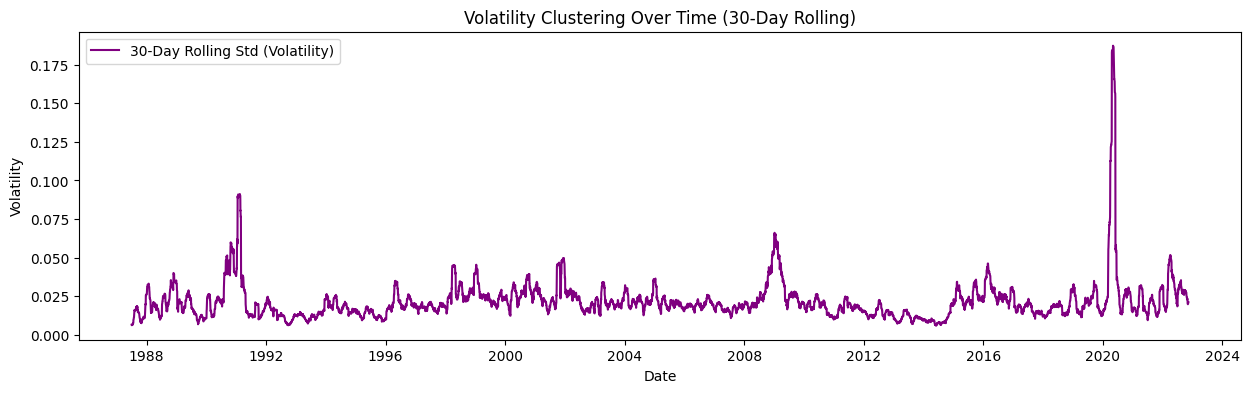

In [9]:
plot_rolling_volatility(price_df, window=30)

# ⚡ Volatility Clustering in Brent Oil Prices (30-Day Rolling Std)

This plot shows the **30-day rolling standard deviation** (volatility) of daily log returns for Brent oil prices from 1987 to 2022.

---

## 1. **What Is Volatility Clustering?**
- **Volatility clustering** is a common feature of financial time series, where periods of high volatility (big price swings) tend to cluster together, followed by calm periods.
- The rolling standard deviation (purple line) reflects how "wild" or "calm" the market is at any point in time.

---

## 2. **Key Observations**
- **Quiet Periods:** Most of the time, volatility remains low—between 0.005 and 0.025—showing that daily price changes are relatively mild.
- **Volatility Spikes:**  
    - **1990–1991:** A sharp spike in volatility, corresponding to the Gulf War, when supply fears and geopolitical risk shocked the market.
    - **2008–2009:** Another major spike, driven by the global financial crisis. This reflects the extreme price swings as oil crashed from its all-time highs.
    - **2014–2016:** Moderate elevation during the OPEC policy shift and shale oil glut, but less extreme than prior crises.
    - **2020:** The **largest volatility spike in the series**, coinciding with the COVID-19 pandemic and the historic oil price war. This period saw unprecedented market chaos, even leading to negative oil prices in the U.S. market (WTI).
    - **Smaller bumps** are visible in other periods, often aligning with regional conflicts, economic shocks, or OPEC decisions.
- **Volatility "Clusters":** After each major spike, volatility remains elevated for some time before subsiding—a hallmark of volatility clustering.

---

## 3. **Why Does This Matter?**
- **Risk Management:** Volatility directly impacts risk. Periods of high volatility mean larger, less predictable price swings—crucial for traders, energy companies, and policymakers.
- **Change Point Analysis:** Volatility clusters are prime candidates for structural breaks; sudden, sustained increases in volatility often mark regime changes in the oil market.
- **Forecasting:** Models must account for volatility clustering to make reliable forecasts and risk assessments.

---

**In summary:**  
This plot shows that Brent oil markets are calm much of the time, but when shocks hit—due to war, financial crisis, or pandemic—volatility explodes and stays high for weeks or months. Recognizing these clusters is key for understanding risk and for advanced time series modeling.


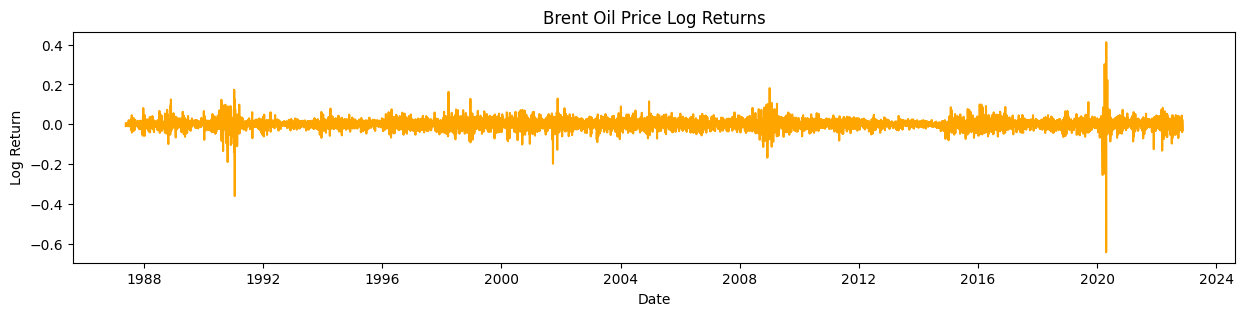

In [10]:
# Plot log returns
price_df = plot_log_return(price_df)

# 📊 Brent Oil Price Log Returns: Interpretation

This plot shows the **logarithmic returns** of Brent oil prices over time. Log returns measure the *relative daily change* in price, making it easier to spot periods of high volatility and sudden shocks, regardless of the underlying price level.

---

## 1. **What Do Log Returns Reveal?**

- **Log returns** are preferred in financial analysis because:
    - They normalize price movements, making comparison across time periods meaningful.
    - They highlight periods of *volatility clustering*—when high volatility is followed by more high volatility (a common feature of financial time series).
    - Extreme values (outliers) correspond to major price jumps or collapses—key for risk analysis.

---

## 2. **Interpreting This Plot**

- **Calm Periods:** Most of the time, log returns cluster tightly around zero, indicating stable daily price changes.
- **Spikes and Dips:** 
    - **1990–91 Gulf War:** Visible as a sudden burst of both positive and negative returns.
    - **2008 Financial Crisis:** Sharp, repeated swings show extreme volatility as oil spiked and crashed.
    - **2014–16 Oil Glut:** Moderately higher volatility, but not as extreme as crisis periods.
    - **2020 COVID-19 & Price War:** The most extreme movements in the entire series, both upward and downward—corresponds to the oil market collapse and historic negative oil prices.
- **Volatility Clustering:** Notice that after each major shock, the series remains volatile for a while (e.g., after 2008, after early 2020), before settling back to a calm state.

---

## 3. **Why Is This Important?**

- **Volatility is not constant:** The plot shows oil markets are prone to sudden, unpredictable shocks—critical for risk management and forecasting.
- **Change point analysis** on log returns (instead of raw prices) can reveal regime changes in volatility itself—not just price level—such as transitions from calm to turbulent market phases.
- **Risk assessment:** Traders and policymakers monitor log returns to understand the probability and magnitude of extreme moves, which can have outsized economic impacts.

---

**Summary:**  
Brent oil log returns capture the market’s most turbulent episodes. Each major “spike” in this plot tells the story of a supply crisis, demand shock, or policy surprise—insight that is crucial for robust oil market modeling and prediction.


In [11]:
# Stationarity test
adf_test(price_df['Price'])

ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287
The time series is likely non-stationary.


# 📊 Brent Oil Price Log Returns: Interpretation

This plot shows the **logarithmic returns** of Brent oil prices over time. Log returns measure the *relative daily change* in price, making it easier to spot periods of high volatility and sudden shocks, regardless of the underlying price level.

---

## 1. **What Do Log Returns Reveal?**

- **Log returns** are preferred in financial analysis because:
    - They normalize price movements, making comparison across time periods meaningful.
    - They highlight periods of *volatility clustering*—when high volatility is followed by more high volatility (a common feature of financial time series).
    - Extreme values (outliers) correspond to major price jumps or collapses—key for risk analysis.

---

## 2. **Interpreting This Plot**

- **Calm Periods:** Most of the time, log returns cluster tightly around zero, indicating stable daily price changes.
- **Spikes and Dips:** 
    - **1990–91 Gulf War:** Visible as a sudden burst of both positive and negative returns.
    - **2008 Financial Crisis:** Sharp, repeated swings show extreme volatility as oil spiked and crashed.
    - **2014–16 Oil Glut:** Moderately higher volatility, but not as extreme as crisis periods.
    - **2020 COVID-19 & Price War:** The most extreme movements in the entire series, both upward and downward—corresponds to the oil market collapse and historic negative oil prices.
- **Volatility Clustering:** Notice that after each major shock, the series remains volatile for a while (e.g., after 2008, after early 2020), before settling back to a calm state.

---

## 3. **Why Is This Important?**

- **Volatility is not constant:** The plot shows oil markets are prone to sudden, unpredictable shocks—critical for risk management and forecasting.
- **Change point analysis** on log returns (instead of raw prices) can reveal regime changes in volatility itself—not just price level—such as transitions from calm to turbulent market phases.
- **Risk assessment:** Traders and policymakers monitor log returns to understand the probability and magnitude of extreme moves, which can have outsized economic impacts.

---

**Summary:**  
Brent oil log returns capture the market’s most turbulent episodes. Each major “spike” in this plot tells the story of a supply crisis, demand shock, or policy surprise—insight that is crucial for robust oil market modeling and prediction.


### 2. Purpose of Change Point Models

- Detect structural changes in the statistical properties of time series data.
- Identify significant shifts in level (mean) or spread (variance).
- Useful for associating changes with external shocks (e.g., geopolitical events, economic crises, policy changes).

---

### 3. Expected Outputs of Change Point Analysis

| Output               | Description                                      |
|----------------------|--------------------------------------------------|
| Change Point (τ)     | Estimated date where the behavior changes        |
| Mean (μ₁, μ₂, ...)   | Estimated average values before and after change |
| Variance (σ₁, σ₂, ...) | Estimated volatility in each segment             |
| Posterior Distribution | Probabilistic output for uncertainty quantification |

---

### 4. Limitations of Change Point Models

- Does not establish causality—only correlation in time.
- Sensitive to prior assumptions (in Bayesian methods).
- Assumes stationarity within each regime.
- May miss small or gradual changes if overwhelmed by noise.